In [1]:
!pip install mysql-connector-python pandas matplotlib requests sqlalchemy

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/9c/88/bc13c33fca11acaf808bd1809d8602d78f5bb84f7b1e7b1a288c383a14fd/mysql_connector_python-9.5.0-cp311-cp311-win_amd64.whl.metadata
  Using cached mysql_connector_python-9.5.0-cp311-cp311-win_amd64.whl.metadata (7.5 kB)
Using cached mysql_connector_python-9.5.0-cp311-cp311-win_amd64.whl (16.5 MB)


### Impoated Liabraries: 

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sqlalchemy import create_engine

### Python to communicate with the MySQL database

In [3]:
import mysql.connector
print("mysql connector imported")

mysql connector imported


### Check Python Executable Path

In [4]:
import sys
print(sys.executable)

C:\Users\admin\anaconda3\python.exe


### Install MySQL Connector for Active Python Environment

In [5]:
!{sys.executable} -m pip install mysql-connector-python

In [6]:
!pip uninstall mysql-connector-python -y

!pip install pymysql

Found existing installation: mysql-connector-python 9.5.0
Uninstalling mysql-connector-python-9.5.0:
  Successfully uninstalled mysql-connector-python-9.5.0


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\pip\_vend

### Connect Python to MySQL Using PyMySQL

In [7]:
import pymysql

conn = pymysql.connect(
    host="localhost",
    user="root",
    password="divkrish",
    database="demo"
)

cursor = conn.cursor()
print("Connected to MySQL successfully using pymysql")

Connected to MySQL successfully using pymysql


### Create Feedback Table in MySQL Database

In [8]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS feedback (
    id INT AUTO_INCREMENT PRIMARY KEY,
    user_name VARCHAR(100),
    rating INT,
    comment TEXT
)
""")

conn.commit()
print("Table created successfully")

Table created successfully


### Insert Feedback Record into MySQL Table

In [9]:
cursor.execute(
    "INSERT INTO feedback (user_name, rating, comment) VALUES (%s, %s, %s)",
    ("Divya", 5, "Very good service")
)
conn.commit()
print("Feedback inserted")

Feedback inserted


### Insert Multiple Feedback Records into MySQL Table

In [18]:
cursor.execute(
    "INSERT INTO feedback (user_name, rating, comment) VALUES (%s, %s, %s)",
    ("Divya", 5, "Very good service")
)

cursor.execute(
    "INSERT INTO feedback (user_name, rating, comment) VALUES (%s, %s, %s)",
    ("Amit", 4, "Nice experience")
)
cursor.execute(
    "INSERT INTO feedback (user_name, rating, comment) VALUES (%s, %s, %s)",
    ("Ram", 3, "Nice experience")
)

conn.commit()
print("Feedback records inserted successfully")

Feedback records inserted successfully


### Read Feedback Data from MySQL into Pandas DataFrame

In [19]:
import pandas as pd

df = pd.read_sql("SELECT * FROM feedback", conn)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_15872\628778568.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM feedback", conn)


,id,user_name,rating,comment
0,3,Amit,3,Nice experience
1,6,Amit,3,Nice experience
2,7,Divya,5,Very good service
3,8,Amit,4,Nice experience
4,9,Ram,3,Nice experience


### Update Feedback Rating in MySQL Table (UPDATE Operation)

In [20]:
cursor.execute(
    "UPDATE feedback SET rating=%s WHERE user_name=%s",
    (3, "Amit")
)
conn.commit()
print("Feedback updated successfully")

Feedback updated successfully


### Delete Feedback Record from MySQL Table (DELETE Operation)

In [21]:
cursor.execute(
    "DELETE FROM feedback WHERE user_name=%s",
    ("Divya",)
)
conn.commit()
print("Feedback deleted successfully")

Feedback deleted successfully


### Verify Updated Feedback Data from MySQL (READ Operation)


In [22]:
df = pd.read_sql("SELECT * FROM feedback", conn)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_15872\2441898919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM feedback", conn)


,id,user_name,rating,comment
0,3,Amit,3,Nice experience
1,6,Amit,3,Nice experience
2,8,Amit,3,Nice experience
3,9,Ram,3,Nice experience


### Simulated Third-Party API Response

In [23]:
quote = {
    "content": "Be yourself; everyone else is already taken.",
    "author": "Oscar Wilde"
}

print("Quote:", quote["content"])
print("Author:", quote["author"])

Quote: Be yourself; everyone else is already taken.
Author: Oscar Wilde


### Generate Feedback Summary Statistics

In [24]:
# Fetch data from MySQL table
df = pd.read_sql("SELECT * FROM feedback", conn)

total_feedback = df.shape[0]
average_rating = df["rating"].mean()

print("Total Feedback:", total_feedback)
print("Average Rating:", average_rating)

Total Feedback: 4
Average Rating: 3.0


C:\Users\admin\AppData\Local\Temp\ipykernel_15872\1092573059.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM feedback", conn)


### Data Visualization

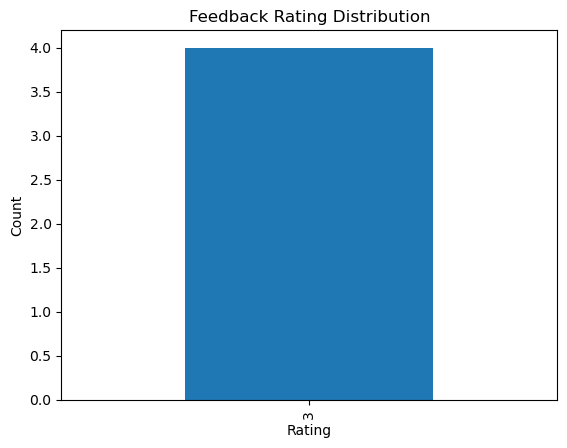

In [25]:
import matplotlib.pyplot as plt

# Rating distribution
rating_distribution = df["rating"].value_counts().sort_index()

rating_distribution.plot(kind='bar')
plt.title("Feedback Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()